# *Python Visualisation Libraries*

In [6]:
# Visualisations are based on two datasets containing NBA data
# alltimeleaders.xlsx - information on leading scorers in the NBA
# stats_all_seasons.csv - information on NBA teams roster such as demographic variables (age, height, weight and place of birth)

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
leading_scorers = pd.read_excel("alltimeleaders.xlsx")
demo_stats = pd.read_csv("stats_all_seasons.csv")

In [7]:
leading_scorers.head(5)

,Unnamed: 0,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,eFG%,TS%
0,0,Kareem Abdul Jabbar,"1,560",57446,38387,15837,28307,55.9,1,18,...,72.1,2975,9394,17440,5660,1160,3189,2527,55.9,59.2
1,1,Karl Malone,"1,476",54852,36928,13528,26210,51.6,85,310,...,74.2,3562,11406,14968,5248,2085,1145,4524,51.8,57.7
2,2,LeBron James,"1,265",48550,34241,12481,24781,50.4,1875,5453,...,73.4,1509,7896,9405,9346,2015,957,4424,54.1,58.6
3,3,Kobe Bryant,"1,346",48643,33643,11719,26200,44.7,1827,5546,...,83.7,1499,5548,7047,6306,1944,640,4010,48.2,55.0
4,4,Michael Jordan,"1,072",41010,32292,12192,24537,49.7,581,1778,...,83.5,1668,5004,6672,5633,2514,893,2924,50.9,56.9


In [8]:
demo_stats.head(5)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


# Matplotlib

In [57]:
#Matplotlib is the most popular data visualization library of Python and is a 2D plotting library

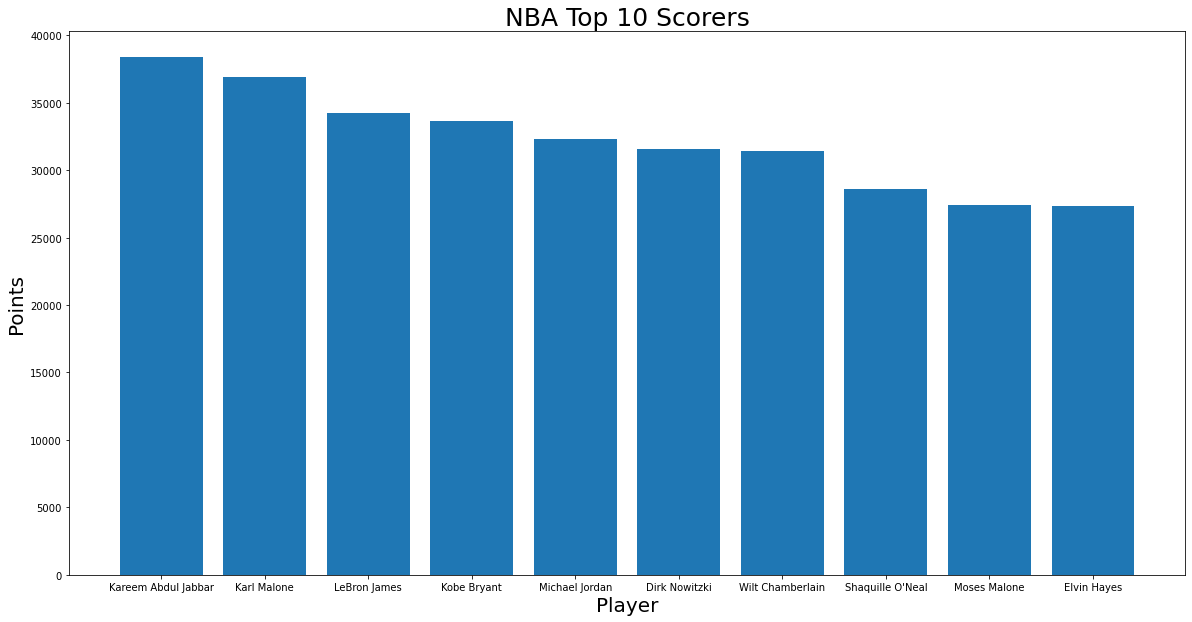

In [58]:
#Format the dataset to include top 10 scorers
top_10 = leading_scorers.sort_values('PTS', ascending = False).head(10)

#We can create a bar chart highlighting the top 10 scorers in the NBA
import matplotlib.pyplot as plt

# Create a figure and axis 
fig, ax = plt.subplots(figsize=(20,10))
# count the occurrence of each class 
ax.bar(top_10['Player'], top_10['PTS'])

# set title and labels 
ax.set_title('NBA Top 10 Scorers').set_size(25)
ax.set_xlabel('Player').set_size(20)
ax.set_ylabel('Points').set_size(20)

# Pandas

In [59]:
#Pandas have a higher level API than Matplotlib and therefore we need less lines of code for the same results

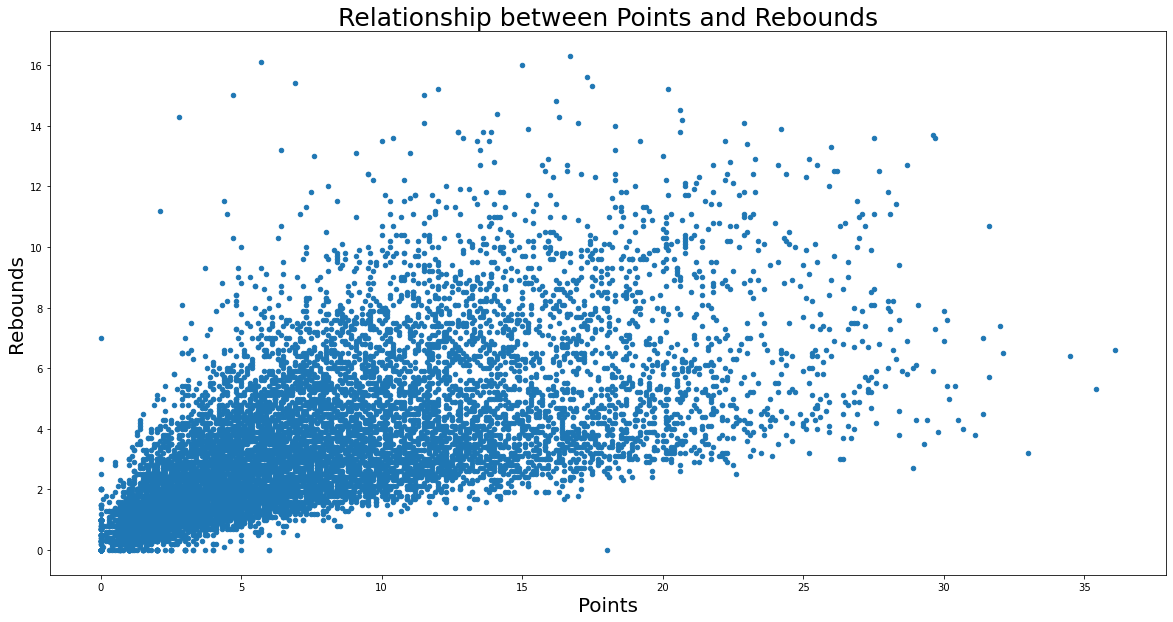

In [67]:
#We can create a scatter plot to show the relationship between player height and weights
plot = demo_stats.plot.scatter(x='pts', y='reb', title='Relationship between Height and Weight',
                               figsize = (20,10))

# set a title and labels
plot.set_title('Relationship between Points and Rebounds').set_size(25)
plot.set_xlabel('Points').set_size(20)
plot.set_ylabel('Rebounds').set_size(20) 


# Seaborn

In [13]:
#Seaborn has a high level interface which helps create visually better graphs

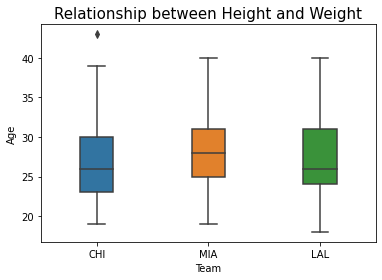

In [60]:
#Format the dataset to include specific teams
height_check = demo_stats.loc[(demo_stats.team_abbreviation == 'LAL') | (demo_stats.team_abbreviation == 'MIA') |
                              (demo_stats.team_abbreviation == 'CHI')]

#We can create a box plot to determine the spread of player ages across teams
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plot = sns.boxplot(x ='team_abbreviation', y = 'age', data = height_check, width = 0.3)

plot.set_title('Relationship between Height and Weight').set_size(15)
plot.set_xlabel('Team').set_size(10)
plot.set_ylabel('Age').set_size(10)

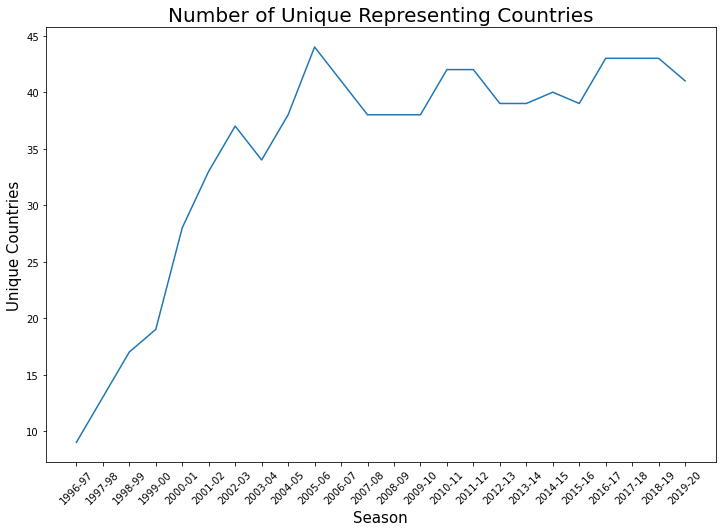

In [62]:
#Format dataset to group on years and count unique results
grouped_years = demo_stats.groupby('season').nunique()

#We can create a line graph to show the how geographically diverse the NBA has become over time
fig = plt.gcf() #code to increase size of visualisation
fig.set_size_inches(12,8) #increase size of visualisation
plt.xticks(rotation=45) #rotate the axis so labels fit

plot = sns.lineplot(x = 'season',y = 'country', data = grouped_years)

plot.set_title('Number of Unique Representing Countries').set_size(20)
plot.set_xlabel('Season').set_size(15)
plot.set_ylabel('Unique Countries').set_size(15)

# Plotly

In [48]:
#Allows us to create interactive graphs online
#Note - will need to pip install cufflinks,plotly and chart-studio before starting

In [49]:
from plotly import __version__

In [50]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

In [51]:
init_notebook_mode(connected = True)

In [52]:
cf.go_offline()

In [68]:
#Similar to the top 10 bar chart created in Matplotlib, we can create an interactive one using Plotly
top_10.iplot(kind = 'bar', x = 'Player', y = 'PTS',size = 5)